[View in Colaboratory](https://colab.research.google.com/github/gbaeke/xylosai/blob/master/regression/Regression_Model_Tensorflow.ipynb)

In [0]:
# see https://www.safaribooksonline.com/library/view/machine-learning-with/9781617293870/kindle_split_013.html
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
lr = 0.01 #learning rate
epochs = 500 #epochs

In [0]:
# let's generate some training data x and y
x_train = np.linspace(-1, 1, 20)
y_train = 10 + 2 * x_train + np.random.randn(*x_train.shape) * 0.3

# note the use of *x_train.shape versus just x_train.shape
# unpacking


In [0]:
# note that x_train and y_train are numpy arrays
# we will present these numpy arrays to tensorflow via placeholders
# these placeholders are used in the session with feed_dict
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [0]:
# next we define the model
# this is often a more complex function (e.g. neural networks) that returns the model
def model(X, w, b):
  return tf.add(tf.multiply(X,w), b)

In [0]:
# we are looking for w and b so those should be variables
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="intercept")

Our model is $f(x)=wx +b$

Cost function is $MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$

In [0]:
# define the model
y_model = model(X, w, b)

#define the cost (mean squared error)
cost = tf.reduce_mean(tf.square(y_model - Y))

In [0]:
# training operation with simple Gradient Descent
train_op = tf.train.GradientDescentOptimizer(lr).minimize(cost)

init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for (x, y) in zip(x_train, y_train):
      sess.run(train_op, feed_dict={X: x, Y: y})

  w_val = sess.run(w) # should be close to 2
  b_val = sess.run(b) # should be close to 10
  print(w_val, b_val)

2.0756197 10.078839


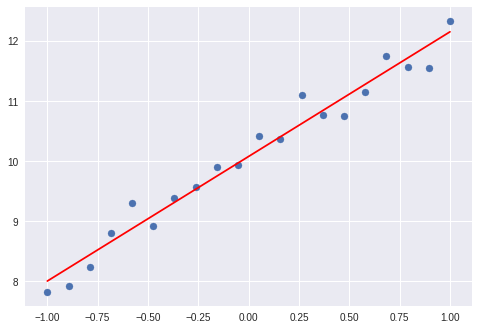

In [10]:
# let's plot all this
plt.scatter(x_train, y_train)
y_learned = x_train * w_val + b_val
plt.plot(x_train, y_learned, 'r')
plt.show()

In [11]:
# just for fun, the same in scikit-learn
from sklearn import linear_model
reg = linear_model.LinearRegression()
# x_train shape is expected as (20,1) not (20,)
# in reshape, -1 let's numpy figure out the dimension size which is 20 here when you want the 2nd dimension to be 1
reg.fit(x_train.reshape(-1,1), y_train) 
print(reg.coef_, reg.intercept_)

[2.08624472] 10.078096713598576


In [12]:
# for even more fun, use normal equation
x_train_b = np.c_[np.ones((20,1)), x_train] # add x0 = 1 to each instance which is format expected below
best_params = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
best_params

array([10.07809671,  2.08624472])